In [1]:
#Importing libraries
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1 * (3/5))
    x1 = int((y1 - intercept) / slope)
    x2 = int((y2 - intercept) / slope)
    return np.array([x1, y1, x2, y2])


In [3]:
def average_slope_intercept(image, lines):
    if lines is None or len(lines) == 0:  # Check if lines is None or empty
        return None
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    if len(left_fit) == 0 or len(right_fit) == 0:  # Check if left_fit or right_fit is empty
        return None
    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line = make_coordinates(image, left_fit_average)
    right_line = make_coordinates(image, right_fit_average)
    return np.array([left_line, right_line])


In [4]:
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 10)
    return line_image

In [5]:
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

In [6]:
def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([[(200, height), (1100, height), (550, 250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

In [7]:
#Load the image
image = cv2.imread('/Users/aditigoel/Documents/Projects/line_detect/test_image.jpg')

In [8]:
lane_image = np.copy(image)

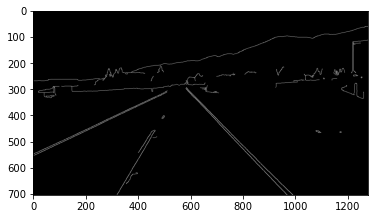

In [9]:
# Apply Canny edge detection
canny_image = canny(image)
plt.imshow(canny_image, cmap='gray')
plt.show()

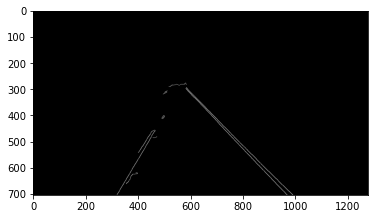

In [10]:
#Apply region of interest
cropped_image = region_of_interest(canny_image)
plt.imshow(cropped_image, cmap='gray')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


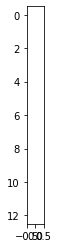

In [11]:
lines = cv2.HoughLinesP(cropped_image, 2,np.pi/180,100, np.array([]), minLineLength=40, maxLineGap=5)
plt.imshow(lines, cmap='gray')
plt.show()

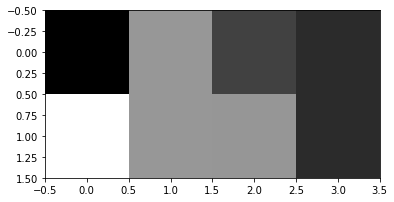

In [12]:
averaged_lines = average_slope_intercept(lane_image, lines)
plt.imshow(averaged_lines, cmap='gray')
plt.show()

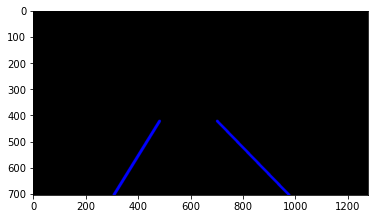

In [13]:
line_image = display_lines(lane_image,averaged_lines)
plt.imshow(line_image, cmap='gray')
plt.show()

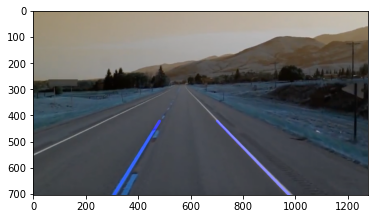

In [14]:
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1,1)
plt.imshow(combo_image, cmap='gray')
plt.show()

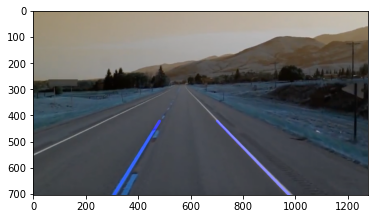

In [15]:
# Display the result
plt.imshow(combo_image, cmap='gray')
plt.show()


In [16]:
cap = cv2.VideoCapture('/Users/aditigoel/Documents/Projects/line_detect/test2.mp4')

In [17]:
while(cap.isOpened()):
    ret, frame = cap.read()
    if not ret:
        break
    canny_image = canny(frame)
    cropped_image = region_of_interest(canny_image)
    lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
    averaged_lines = average_slope_intercept(frame, lines)
    if averaged_lines is not None:
        line_image = display_lines(frame, averaged_lines)
        combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
        cv2.imshow('result', combo_image)
    else:
        cv2.imshow('result', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
